In [25]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [28]:
dataset.shape

(10000, 14)

In [29]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
## Independent and dependent features
x=dataset.iloc[:,3:13] ## Excluding the first three columns
y=dataset.iloc[:,13] ## last column is my output
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [47]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [48]:
x=x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [49]:
x=pd.concat([x,geography,gender],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [50]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [55]:
## create artificial neural network
from tensorflow.keras.models import Sequential ## Sequential is used to initialize the neural network
from tensorflow.keras.layers import Dense    ## Dense is used to add layers in the neural network
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU  ## Activation functions
from tensorflow.keras.layers import Dropout   ## Dropout is used to add dropout layers in the neural network



In [57]:
# Initialising the ANN
classifier = Sequential()
x.shape


(10000, 11)

In [58]:
# Adding the input layer
classifier.add(Dense(units = 11,activation='relu'))

In [60]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [61]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [62]:
# adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [63]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) ## binary_crossentropy is used for binary classification


In [64]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [74]:
## early stopping
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    
)

In [75]:
model_hit=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8746 - loss: 0.2979 - val_accuracy: 0.8459 - val_loss: 0.3756
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8720 - loss: 0.3049 - val_accuracy: 0.8535 - val_loss: 0.3774
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8620 - loss: 0.3172 - val_accuracy: 0.8451 - val_loss: 0.3795
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8739 - loss: 0.2955 - val_accuracy: 0.8444 - val_loss: 0.3798
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8699 - loss: 0.3101 - val_accuracy: 0.8466 - val_loss: 0.3806
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8777 - loss: 0.2891 - val_accuracy: 0.8417 - val_loss: 0.3795
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8749 - loss: 0.3014 - val_accuracy: 0.8482 - val_loss: 0.3726
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8696 - loss: 0.2951 - 

In [76]:
model_hit.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

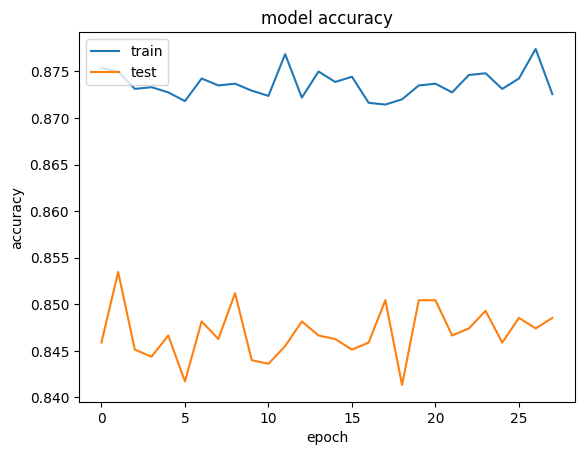

In [77]:
plt.plot(model_hit.history['accuracy'])
plt.plot(model_hit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

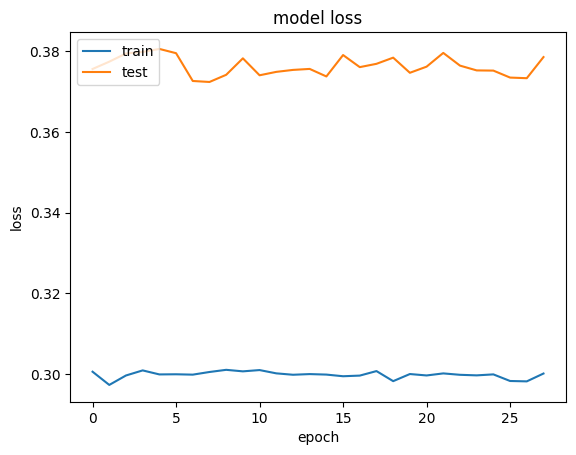

In [78]:
plt.plot(model_hit.history['loss'])
plt.plot(model_hit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()